# Prophet model from facebook to be used in time series analysis

In [58]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [77]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [60]:
# load the dataset
df = pd.read_csv('DailyDelhiClimateTrain.csv', index_col="date",  parse_dates=True)
(df.head())
(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [61]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

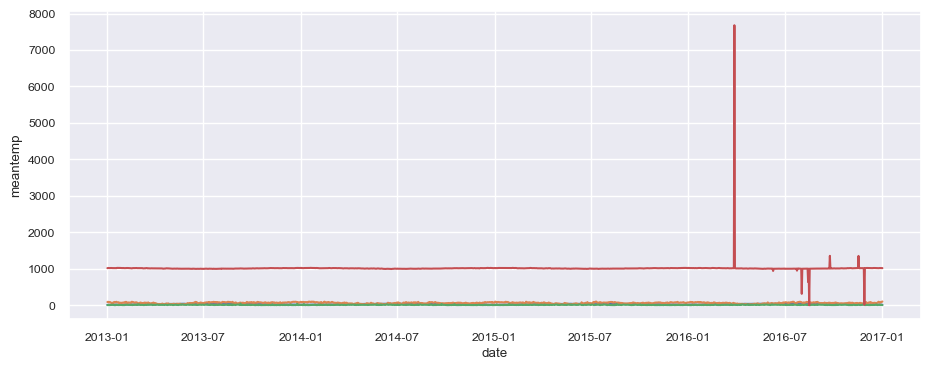

In [62]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df, x="date", y="meantemp")
sns.lineplot(data=df, x="date", y="humidity")
sns.lineplot(data=df, x="date", y="wind_speed")
sns.lineplot(data=df, x="date", y="meanpressure")

In [63]:
# draw same plot on plotly
fig = px.line(df, x=df.index, y='meanpressure', title='Mean pressure')
fig.show()

In [64]:
# interpolate the outliers from mean pressure column on 28.March.2016
df.loc['2016-03-28', 'mean_pressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp           25.933333
humidity           52.800000
wind_speed          6.546667
meanpressure     7679.333333
mean_pressure            NaN
Name: 2016-03-28 00:00:00, dtype: float64

In [65]:
# make a scatter plot between meantemp and humidity
fig = px.scatter(df, x='meantemp', y='humidity', title='Mean Tempurature vs Humidity',
                 trendline='ols', trendline_color_override='red') 
fig.show()

In [66]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'], df['humidity'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.572


<Axes: >

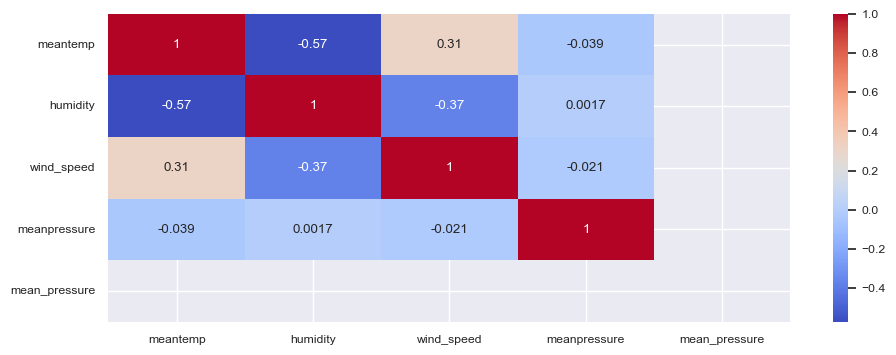

In [67]:
# make a heatmap of correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [68]:
# lets scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

c:\Users\Welcome\.conda\envs\python_ml\Lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning:

invalid value encountered in divide

c:\Users\Welcome\.conda\envs\python_ml\Lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning:

invalid value encountered in divide

c:\Users\Welcome\.conda\envs\python_ml\Lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning:

invalid value encountered in divide



,meantemp,humidity,wind_speed,meanpressure,mean_pressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03,0.0
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16,NaN
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00,NaN
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00,NaN
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02,NaN
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02,NaN
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02,NaN
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01,NaN


<Axes: >

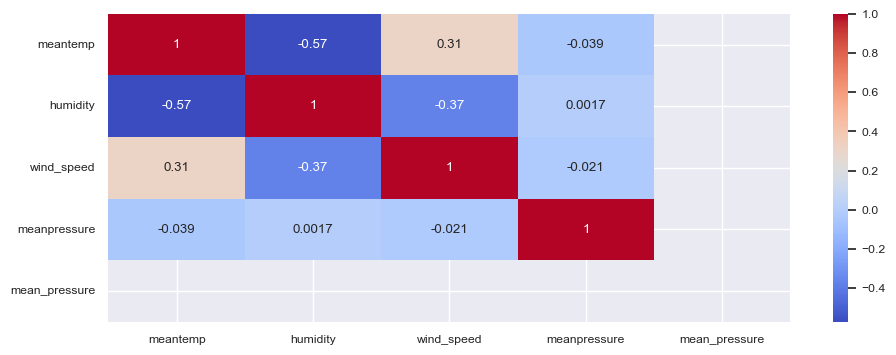

In [69]:
# make a correlation heatmap of scaled data
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm') # we want to see any change

<Axes: xlabel='date', ylabel='meantemp'>

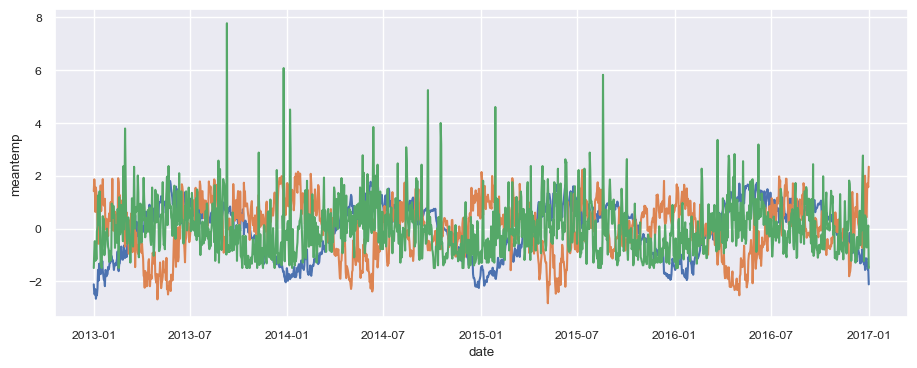

In [70]:
# draw a line plot
sns.set(rc={'figure.figsize':(11,4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x='date', y='meantemp')
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x='date', y='wind_speed')
# sns.lineplot(data=df_scaled, x="date", y="meanpressure")

In [71]:
# add two columns in the dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,mean_pressure,month,year
date,,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,NaN,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,NaN,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,NaN,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,NaN,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,NaN,1,2013


In [72]:
# add two columns in the dataset for month and year
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,mean_pressure,month,year
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,1,2013


(1.0, 12.0)

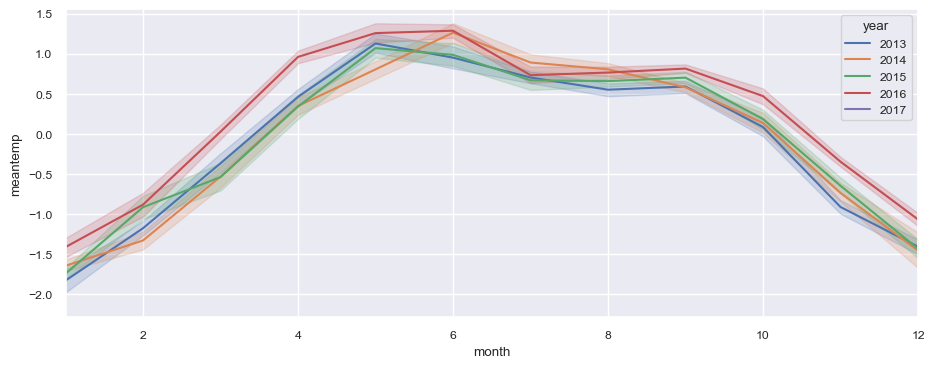

In [73]:
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue="year", palette="deep")
plt.xlim(1, 12)

In [74]:
# same in plotly
fig = px.line(df_scaled, x=df_scaled.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

In [75]:
# same in plotly
fig = px.line(df, x=df.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

# lets use prophet model from python

In [80]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.info()
# rename the columns
df = df.rename(columns={'date':'ds', 'meantemp':'y'})
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [81]:
print(df)

              ds          y    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [88]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# call the model
model = Prophet()
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
plot_plotly(model, forecast)

22:34:36 - cmdstanpy - INFO - Chain [1] start processing
22:34:37 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.671414,9.015502,14.138033,24.671414,24.671414,-12.940009,-12.940009,-12.940009,0.034152,0.034152,0.034152,-12.974161,-12.974161,-12.974161,0.0,0.0,0.0,11.731405
1,2013-01-02,24.671625,9.319296,14.518949,24.671625,24.671625,-12.803787,-12.803787,-12.803787,0.146333,0.146333,0.146333,-12.950120,-12.950120,-12.950120,0.0,0.0,0.0,11.867838
2,2013-01-03,24.671836,9.049471,14.442416,24.671836,24.671836,-12.843663,-12.843663,-12.843663,0.067182,0.067182,0.067182,-12.910845,-12.910845,-12.910845,0.0,0.0,0.0,11.828173
3,2013-01-04,24.672047,9.347848,14.271561,24.672047,24.672047,-12.830774,-12.830774,-12.830774,0.027514,0.027514,0.027514,-12.858288,-12.858288,-12.858288,0.0,0.0,0.0,11.841273
4,2013-01-05,24.672258,9.276129,14.362073,24.672258,24.672258,-12.863631,-12.863631,-12.863631,-0.069183,-0.069183,-0.069183,-12.794448,-12.794448,-12.794448,0.0,0.0,0.0,11.808626
